## The correlation analysis of tips and elites

In [2]:
import json
import os

review=[]
with open('../../hduser1/Yelp/review.json') as json_file:
    for line in json_file:
        review.append(json.loads(line))
len(review)

4153150

In [3]:
users=[]
with open('../../hduser1/Yelp/user.json') as json_file:
    for line in json_file:
        users.append(json.loads(line))
len(users)

tips=[]
with open('../../hduser1/Yelp/tip.json') as json_file:
    for line in json_file:
        tips.append(json.loads(line))
len(tips)

business=[]
with open('../../hduser1/Yelp/business.json') as json_file:
    for line in json_file:
        business.append(json.loads(line))
len(business)

144072

In [4]:
tips[1]

{u'business_id': u'jH19V2I9fIslnNhDzPmdkA',
 u'date': u'2015-08-12',
 u'likes': 0,
 u'text': u'Great breakfast large portions and friendly waitress. I highly recommend it',
 u'type': u'tip',
 u'user_id': u'ZcLKXikTHYOnYt5VYRO5sg'}

In [5]:
import pandas as pd
dates = []
for t in tips:
    dates.append(t['date'])
df_dates = pd.DataFrame({'date': pd.Series(dates)})
df_dates.head()

,date
0,2012-07-15
1,2015-08-12
2,2014-06-20
3,2016-10-12
4,2016-07-03


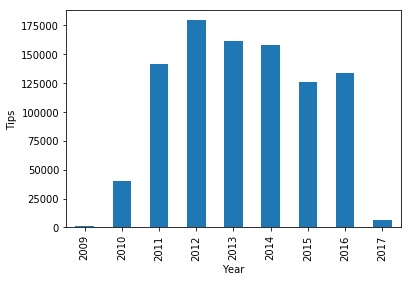

In [6]:
import matplotlib.pyplot as plt
# Year vs amount of tips
plt.close()
df_dates['date'].groupby(df_dates['date'].astype("datetime64").dt.year).count().plot(kind="bar")
plt.xlabel('Year')
plt.ylabel('Tips')
plt.show()

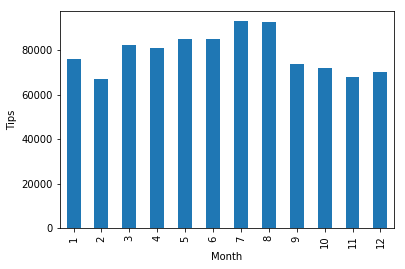

In [7]:
# Month vs amount of tips
plt.close()
df_dates['date'].groupby(df_dates['date'].astype("datetime64").dt.month).count().plot(kind="bar")
plt.xlabel('Month')
plt.ylabel('Tips')
plt.show()

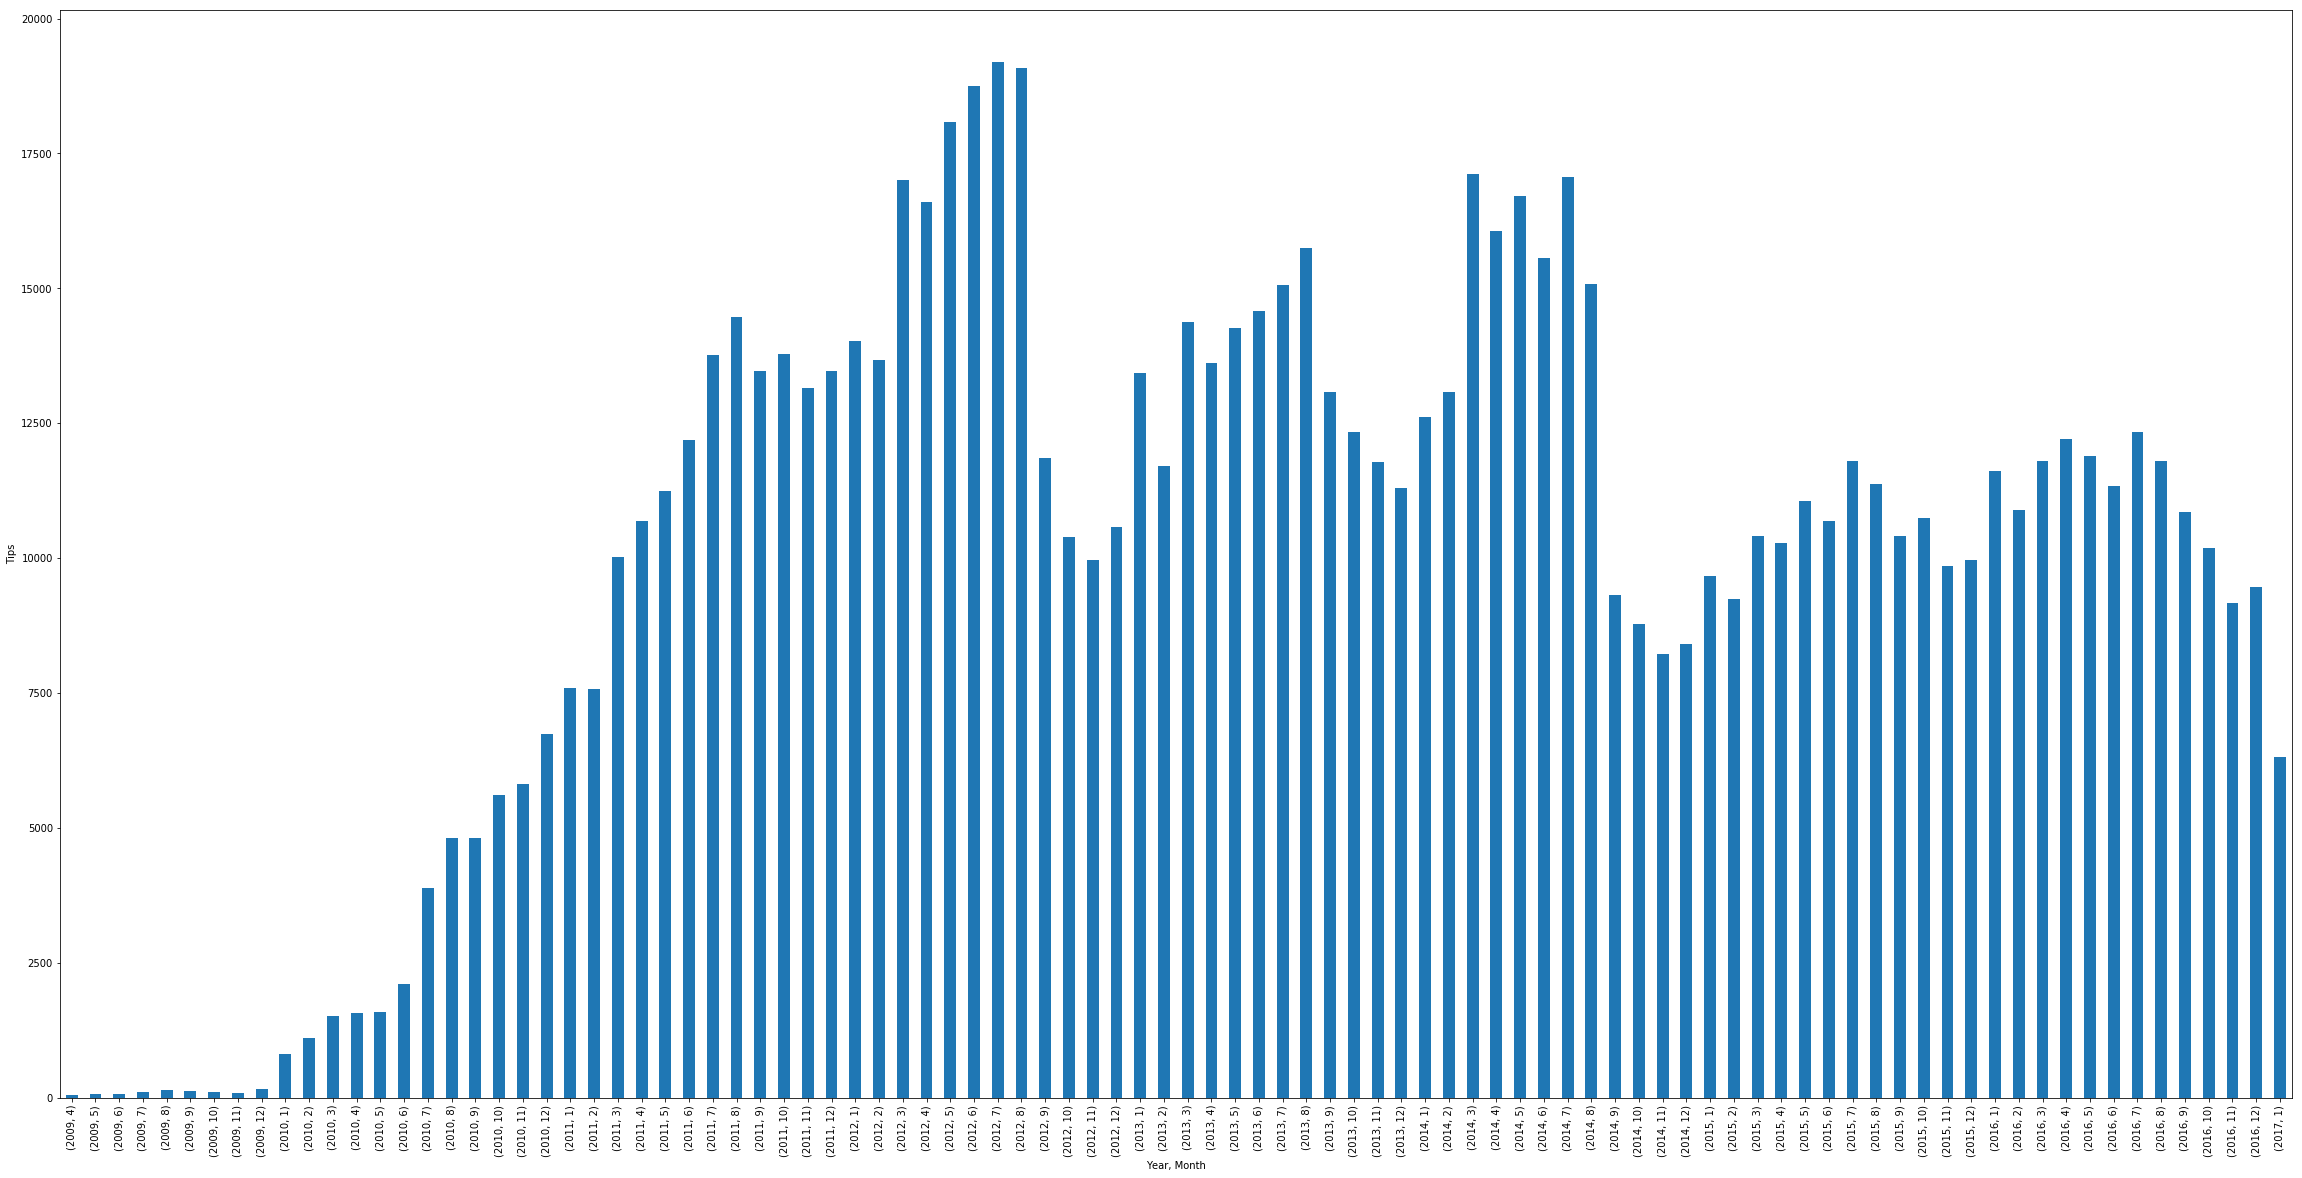

In [8]:
# Year vs amount of new users
plt.close()
plt.figure(figsize= (40,20))
df_dates['date'].groupby([df_dates['date'].astype("datetime64").dt.year, df_dates['date'].astype("datetime64").dt.month]).count().plot(kind="bar")
plt.xlabel('Year, Month')
plt.ylabel('Tips')
plt.savefig('graph1.png')
plt.show()

In [9]:
freq = df_dates['date'].groupby([df_dates['date'].astype("datetime64").dt.year, df_dates['date'].astype("datetime64").dt.month]).count().values
# normalize data
from sklearn import preprocessing
freq_l2 = preprocessing.normalize(freq.reshape(1,-1), norm='l2')
freq_l1 = preprocessing.normalize(freq.reshape(1,-1), norm='l1')
freq_max = preprocessing.normalize(freq.reshape(1,-1), norm='max')

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [10]:
# new data frame
time = []
votes = []
for t in tips:
    votes.append(t['likes'])
    time.append(t['date'])

votes_df = pd.DataFrame({'likes':pd.Series(votes), 'date':pd.Series(time)})

In [11]:
import numpy as np
votes_df.head()
np.mean(votes)

0.016906824424255229

In [12]:
# Time vs amount of votes

votes_df.groupby([votes_df['date'].astype("datetime64").dt.year, 
                          votes_df['date'].astype("datetime64").dt.month]).head()
tips[0].keys()

[u'user_id', u'text', u'business_id', u'likes', u'date', u'type']

In [13]:
count = 0
non_zero = []
for t in tips:
    if int(t['likes']) == 0:
        count += 1
    else:
        non_zero.append(t)
count

932278

In [14]:
likes_array = []
for n in non_zero:
    likes_array.append(int(n['likes']))
np.mean(likes_array)

1.1174416980868593

In [15]:
# convert tips into a dataframe
user_id = []
text = []
business_id = []
date = []
likes = []

for t in tips:
    user_id.append(t['user_id'])
    text.append(t['text'])
    business_id.append(t['business_id'])
    date.append(t['date'])
    likes.append(t['likes'])

tips_df = pd.DataFrame({'user_id':pd.Series(user_id), 
                        'date':pd.Series(date), 
                        'text':pd.Series(text),
                        'likes':pd.Series(likes),
                        'business_id':pd.Series(business_id)})
tips_df.sort_values(['likes'], ascending = False).head()

,business_id,date,likes,text,user_id
247955,gwdQwe1JHLe-vPY9PjKOUg,2016-11-15,15,My kitty Rocky is so very sick with osteosarco...,wTfb2nfzPIyFcYQArdPtuQ
247935,Rrzm4bQDrrUnDyA5eRY3KQ,2016-09-14,12,1st Pet was very kind in regards to helping wi...,wTfb2nfzPIyFcYQArdPtuQ
470436,j7zJxmr8BfYJhC3KW9BshA,2015-09-17,11,License photographer assured me her photos alw...,8DEyKVyplnOcSKx39vatbg
383619,QJ6GXAAMkgCZPF0bZk0xLw,2015-06-18,9,Heads up.... The sweet older couple who owned ...,Fv0e9RIV9jw5TX3ctA1WbA
825240,-PABBD9nMgAYZHSShqGsjg,2014-06-08,7,Don't plan on coming here unless you have at l...,znyfmA7kGcyG3YxkpHCA6Q


In [16]:
print(tips_df.sort_values(['likes'], ascending = False)['text'][247935])
tips_df.groupby('user_id').sum().sort_values(['likes'], ascending = False).head()

1st Pet was very kind in regards to helping with my best boy doggy Clopi's last minutes. RIP Clopi ~ Mommy loves you forever...


,likes
user_id,
mkbx55W8B8aPLgDqex7qgg,733
A0j21z2Q1HGic7jW6e9h7A,145
0tvCcnfJnSs55iB6mqPk3w,134
R5WcogaoAwjdHxrB2v5NsQ,110
2EuPAGalYnP7eSxPgFCNDg,108


In [302]:
tips_df.groupby('business_id').count().sort_values(['user_id'], ascending = False)['user_id'].head(10)

business_id
FaHADZARwnY4yvlvpnsfGA    3405
JmI9nslLD7KZqRr__Bg6NQ    2289
DkYS3arLOhA8si5uUEmHOw    1420
hihud--QRriCYZw1zZvW4g    1398
5LNZ67Yw9RD6nf4_UhXOjw    1383
K7lWdNUhCbcnEvI0NhGewg    1274
RESDUcs7fIiihp38-d6_6g    1015
yfxDa8RFOvJPQh0rNtakHA    1008
4JNXUYY8wbaaDmk3BPzlWw     967
iCQpiavjjPzJ5_3gPD5Ebg     954
Name: user_id, dtype: int64

In [17]:
likes_sum = tips_df.groupby('user_id').sum().sort_values(['likes'], ascending = False)

In [18]:
user_tips = likes_sum.index.values
sum_like = likes_sum.values.reshape(-1)

In [19]:
user_dict = {}
count = 0
for u in users:
    user_dict[u['user_id']] = count
    count += 1

In [20]:
is_elite = []
for ut in user_tips:
    index = user_dict[ut]
    if (users[index]['elite'][0] == 'None'):
        is_elite.append(False)
    else:
        is_elite.append(True)

In [21]:
# create a dataframe with elite field
user_tips_df = pd.DataFrame({'user_id':pd.Series(user_tips), 
                        'sum_like':pd.Series(sum_like), 
                        'is_elite':pd.Series(is_elite),})

In [22]:
user_tips_df.tail()

,is_elite,sum_like,user_id
212045,True,0,KfuV9a5luWIFoJxphLrQxQ
212046,False,0,KfvNqHWjrr0k9tE3sKTrOA
212047,False,0,Kfvx6c6PbyXDO_FfHbYdyw
212048,False,0,KfznHOCjmMBP-fYsRgmiXA
212049,False,0,zzyzP--p98zZtx359NvgGA


In [23]:
total_tips = tips_df.groupby('user_id').count().sort_values(['likes'], ascending = False)
tips_v = total_tips.values[:,0]
user_idv = total_tips.index.values

In [24]:
user_total_tips= {}
for i in range(len(tips_v)):
    user_total_tips[user_idv[i]] = tips_v[i]

In [25]:
user_v_ttips = []
for u in user_tips_df['user_id']:
    user_v_ttips.append(user_total_tips[u])
user_tips_df['total'] = pd.Series(user_v_ttips)
user_tips_df.head()

,is_elite,sum_like,user_id,total
0,False,733,mkbx55W8B8aPLgDqex7qgg,1447
1,True,145,A0j21z2Q1HGic7jW6e9h7A,868
2,True,134,0tvCcnfJnSs55iB6mqPk3w,992
3,True,110,R5WcogaoAwjdHxrB2v5NsQ,352
4,True,108,2EuPAGalYnP7eSxPgFCNDg,970


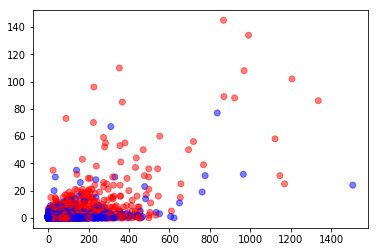

In [26]:
def helper(x):
    if x:
        return 'red'
    else:
        return 'blue'
color = map(helper, user_tips_df['is_elite'])
plt.scatter(user_tips_df['total'][1:], user_tips_df['sum_like'][1:], c=color[1:], alpha=0.5)
plt.show()

In [27]:
user_tips_df['like_rate'] = pd.Series(user_tips_df['sum_like']/user_tips_df['total'])

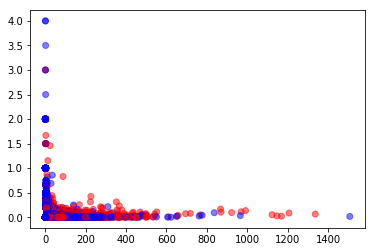

In [28]:
plt.scatter(user_tips_df['total'][1:], user_tips_df['like_rate'][1:], c=color[1:], alpha=0.5)
plt.show()

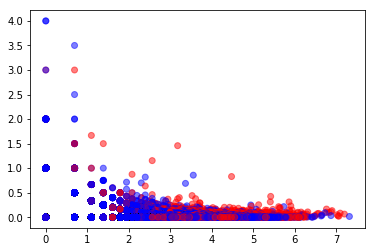

In [28]:
import math
plt.scatter(map(math.log, user_tips_df['total'][1:]), user_tips_df['like_rate'][1:], c=color[1:], alpha=0.5)
plt.show()

In [69]:
# create 2 new columns in tips. by_elite and by_future_elite

# create a data frame
user_df = pd.DataFrame(users)

In [31]:
def elite_length(x):
    if x[0] != 'None':
        return len(x)
    else:
        return 0
    
user_df['elite_duration'] = user_df['elite'].apply(elite_length)    

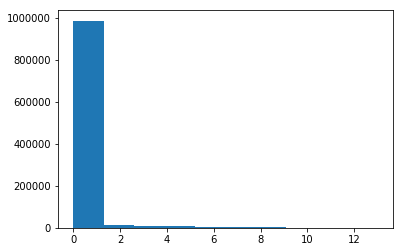

In [35]:
# histogram for the duration of elite years
plt.hist(user_df['elite_duration'])
plt.show()

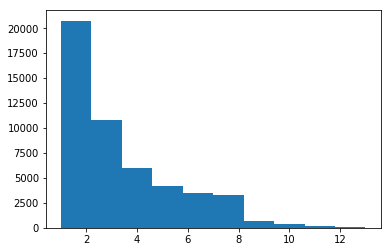

In [46]:
# exclude 0
plt.hist(user_df.ix[np.where(user_df['elite_duration'] != 0)]['elite_duration'])
plt.show()

## Correlation between the business categoriy and tips by elites

In [47]:
# add column to show if the tip was written by current elite
tips_df.head()

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ
4,SqW3igh1_Png336VIb5DUA,2016-07-03,0,Come early on Sunday's to avoid the rush,ulQ8Nyj7jCUR8M83SUMoRQ


In [139]:
# helper function for apply
def is_elite(x):
    year = pd.to_datetime(x['date']).date().year
    user_idx = user_dict[x['user_id']]
    return str(year) in users[user_idx]['elite']
    
tips_df['by_elite'] = tips_df.apply(is_elite, axis = 1)

In [169]:
print(str(float(tips_df.ix[tips_df['by_elite']].size) / float(tips_df.size)) +"% is written by elites")
print("average like by elites: " + str(tips_df.ix[tips_df['by_elite'] == True]['likes'].mean()))
print("average like by non-elites: " + str(tips_df.ix[tips_df['by_elite'] != True]['likes'].mean()))

0.223159729558% is written by elites
average like by elites: 0.0321809480077
average like by non-elites: 0.0125190893675


In [171]:
# helper function for apply
def is_future_elite(x):
    year = pd.to_datetime(x['date']).date().year
    user_idx = user_dict[x['user_id']]
    return str(year+1) in users[user_idx]['elite']
    
tips_df['by_future_elite'] = tips_df.apply(is_future_elite, axis = 1)

In [191]:
print(tips_df.ix[tips_df['by_future_elite']].size)
print(tips_df.ix[tips_df['by_elite']].size)
print(tips_df.ix[~(tips_df['by_elite']) & ~(tips_df['by_future_elite'])].size)

1503194
1478701
4957141


In [180]:
tips_df.ix[tips_df['by_future_elite']].head()

,business_id,date,likes,text,user_id,by_elite,by_future_elite
13,c5NHHW0sNm7eaQBwvQJkkw,2015-10-28,0,Brisket sandwich not bad but ask for extra nap...,ulQ8Nyj7jCUR8M83SUMoRQ,False,True
81,JzB7NITHQ7gVHGVZ1ntgIQ,2015-07-27,0,"Closes at midnight, not 2am.",QGgWWhEi5R4SLAKN-xwtNQ,True,True
82,gWa8pM4i8cti9HjtUdw8yg,2015-06-04,0,They have a massage therapist on staff too,QGgWWhEi5R4SLAKN-xwtNQ,True,True
83,WsL82O6zO2gnxoaJzlUvAQ,2015-10-15,0,Warning to all Yelpers...never buy anything he...,QGgWWhEi5R4SLAKN-xwtNQ,True,True
84,8nNB_yG1gzVpbqNH2EBucg,2014-03-05,0,Recommend reservations as they can get a littl...,QGgWWhEi5R4SLAKN-xwtNQ,False,True


In [207]:
# business_0 : tips are written by non-elites
# business_1 : tips are written by current elites
# business_2 : tips are written by future elites

# business_3 : tips are written by current but not future elites
# business_4 : tips are written by future but not current elites

# business_5 : tips are written by 2-year elites

business_0 = tips_df.ix[~(tips_df['by_elite']) & ~(tips_df['by_future_elite'])]['business_id']
business_1 = tips_df.ix[tips_df['by_elite']]['business_id']
business_2 = tips_df.ix[tips_df['by_future_elite']]['business_id']

business_3 = tips_df.ix[~(tips_df['by_future_elite']) & (tips_df['by_elite'])]['business_id']
business_4 = tips_df.ix[~(tips_df['by_elite']) & (tips_df['by_future_elite'])]['business_id']

business_5 = tips_df.ix[(tips_df['by_elite']) & (tips_df['by_future_elite'])]['business_id']

In [214]:
print(business_0.unique().size)

print(business_1.unique().size)
print(business_2.unique().size)

print(business_3.unique().size) # slack
print(business_4.unique().size) # potential 
print(business_5.unique().size) # solid

84476
52400
52570
13111
14230
49302


In [236]:
type0 = business_df.ix[business_df.business_id.isin(business_0)]
type1 = business_df.ix[business_df.business_id.isin(business_1)]
type2 = business_df.ix[business_df.business_id.isin(business_2)]
type3 = business_df.ix[business_df.business_id.isin(business_3)]
type4 = business_df.ix[business_df.business_id.isin(business_4)]
type5 = business_df.ix[business_df.business_id.isin(business_5)]

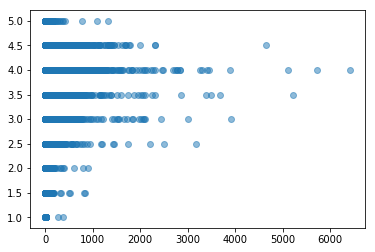

In [272]:
plt.scatter(type3['review_count'], (type3['stars']), alpha = 0.5)
plt.show()

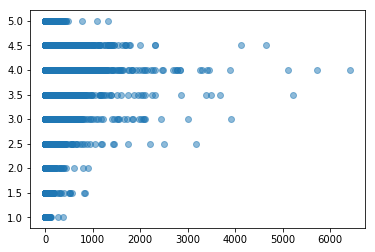

In [264]:
plt.scatter(type0['review_count'], (type0['stars']), alpha = 0.5)
plt.show()

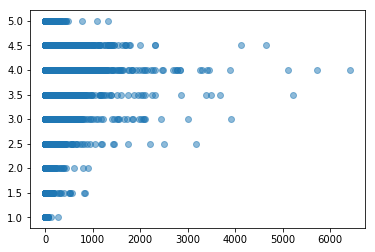

In [263]:
plt.scatter(type5['review_count'], (type5['stars']), alpha = 0.5)
plt.show()

In [269]:
print(type0['stars'].mean())
print(type1['stars'].mean())
print(type2['stars'].mean())
print(type3['stars'].mean())
print(type4['stars'].mean())
print(type5['stars'].mean())

3.59928263649
3.57996183206
3.57659311394
3.63408588208
3.58130709768
3.58074723135


In [270]:
print(type0['review_count'].mean())
print(type1['review_count'].mean())
print(type2['review_count'].mean())
print(type3['review_count'].mean())
print(type4['review_count'].mean())
print(type5['review_count'].mean())

44.223744022
59.7974618321
59.7906600723
127.673937915
127.2471539
62.1662204373


## Correlation between the business categoriy and reviews by elites

In [295]:
review_df = pd.DataFrame(review)

In [296]:
review_df.head()

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,2aFiy99vNLklCx3T_tGS9A,0,2011-10-10,0,NxL8SIC5yqOdnlXCg18IBg,5,If you enjoy service by someone who is as comp...,review,0,KpkOkG6RIf4Ra25Lhhxf1A
1,2aFiy99vNLklCx3T_tGS9A,0,2010-12-29,0,pXbbIgOXvLuTi_SPs1hQEQ,5,After being on the phone with Verizon Wireless...,review,1,bQ7fQq1otn9hKX-gXRsrgA
2,2aFiy99vNLklCx3T_tGS9A,0,2011-04-29,0,wslW2Lu4NYylb1jEapAGsw,5,Great service! Corey is very service oriented....,review,0,r1NUhdNmL6yU9Bn-Yx6FTw
3,2LfIuF3_sX6uwe-IR-P0jQ,1,2014-07-14,0,GP6YEearUWrzPtQYSF1vVg,5,Highly recommended. Went in yesterday looking ...,review,0,aW3ix1KNZAvoM8q-WghA3Q
4,2LfIuF3_sX6uwe-IR-P0jQ,0,2014-01-15,0,25RlYGq2s5qShi-pn3ufVA,4,I walked in here looking for a specific piece ...,review,0,YOo-Cip8HqvKp_p9nEGphw


In [297]:
review_df['by_elite'] = review_df.apply(is_elite, axis = 1)

In [308]:
review_df['by_future_elite'] = review_df.apply(is_future_elite, axis = 1)

In [307]:
review_df.ix[review_df['by_elite'] == True].head()

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id,by_elite
12,2LfIuF3_sX6uwe-IR-P0jQ,0,2015-01-13,0,l-yhe0IFJ7WTgEk0qD8yqA,4,Modern on Melrose is one of our favorite shops...,review,0,5NDk-q5mv8PIDvz83HwMVg,True
21,0czfEgv9KAD4VlIa7ANPWQ,4,2007-12-15,5,RAzbLYbgw3tNv8Tu0R7qmQ,3,"Hmmm, what to say about Mint.\n\nOkay, if you ...",review,5,B7ecAeAIrXg7sgmabS38pg,True
23,0czfEgv9KAD4VlIa7ANPWQ,1,2009-02-01,4,dfL5TyVib8uZgxaNMwx7Aw,2,I remember really enjoying browsing through Mi...,review,3,je5k8a3qIOM0VJE5MaxsfQ,True
24,0czfEgv9KAD4VlIa7ANPWQ,0,2007-03-04,1,z5OD5c-nu2v1xwfG0mAIiA,4,The vintage 1930 beaded earrings are still cal...,review,2,TryfbZaaGtedncOMq9k86g,True
40,4P-vTvE6cncJyUyLh73pxw,0,2013-02-12,0,CdBHQT3WuYuQf-VQ1Um8tQ,3,"Alright, i was about to give it 3 stars bc it'...",review,0,OdTvOw8NKzaCcsj_dnRZSQ,True


In [319]:
# save data
review_df.to_csv('kenta_review.csv', encoding = 'utf-8')
tips_df.to_csv('kenta_tip.csv',  encoding = 'utf-8')

In [320]:
review_type0 = review_df.ix[~(review_df['by_elite']) & ~(review_df['by_future_elite'])]['business_id'] # non-elites
review_type1 = review_df.ix[ (review_df['by_elite']) &  (review_df['by_future_elite'])]['business_id'] # real elites
review_type2 = review_df.ix[~(review_df['by_elite']) &  (review_df['by_future_elite'])]['business_id'] # potential
review_type3 = review_df.ix[ (review_df['by_elite']) & ~(review_df['by_future_elite'])]['business_id'] # slack

In [322]:
print(len(review_type0))
print(len(review_type1))
print(len(review_type2))
print(len(review_type3))

3232165
725732
115593
79660


In [323]:
type0_r = business_df.ix[business_df.business_id.isin(review_type0)]
type1_r = business_df.ix[business_df.business_id.isin(review_type1)]
type2_r = business_df.ix[business_df.business_id.isin(review_type2)]
type3_r = business_df.ix[business_df.business_id.isin(review_type3)]

In [329]:
print(review_df.ix[~(review_df['by_elite']) & ~(review_df['by_future_elite'])]['funny'].mean())
print(review_df.ix[ (review_df['by_elite']) &  (review_df['by_future_elite'])]['funny'].mean())
print(review_df.ix[~(review_df['by_elite']) &  (review_df['by_future_elite'])]['funny'].mean())
print(review_df.ix[ (review_df['by_elite']) & ~(review_df['by_future_elite'])]['funny'].mean())

0.221579653266
1.21550379479
0.533466559394
1.03184785338


In [330]:
print(review_df.ix[~(review_df['by_elite']) & ~(review_df['by_future_elite'])]['cool'].mean())
print(review_df.ix[ (review_df['by_elite']) &  (review_df['by_future_elite'])]['cool'].mean())
print(review_df.ix[~(review_df['by_elite']) &  (review_df['by_future_elite'])]['cool'].mean())
print(review_df.ix[ (review_df['by_elite']) & ~(review_df['by_future_elite'])]['cool'].mean())

0.255782115084
1.61572453743
0.677039267084
1.35463218679


In [331]:
print(review_df.ix[~(review_df['by_elite']) & ~(review_df['by_future_elite'])]['useful'].mean())
print(review_df.ix[ (review_df['by_elite']) &  (review_df['by_future_elite'])]['useful'].mean())
print(review_df.ix[~(review_df['by_elite']) &  (review_df['by_future_elite'])]['useful'].mean())
print(review_df.ix[ (review_df['by_elite']) & ~(review_df['by_future_elite'])]['useful'].mean())

0.672104920386
2.36136893509
1.22296332823
2.00927692694


In [332]:
print(review_df.ix[~(review_df['by_elite']) & ~(review_df['by_future_elite'])]['stars'].mean())
print(review_df.ix[ (review_df['by_elite']) &  (review_df['by_future_elite'])]['stars'].mean())
print(review_df.ix[~(review_df['by_elite']) &  (review_df['by_future_elite'])]['stars'].mean())
print(review_df.ix[ (review_df['by_elite']) & ~(review_df['by_future_elite'])]['stars'].mean())

3.71234141821
3.75352196127
3.76635263381
3.80222194326
